In [1]:
import pandas as pd
import numpy as np
import pdb 
from datetime import datetime, timedelta
from dis import dis
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("prepped_data.csv")

def permutation(x, y, permIter = 100):    
    
    OutB = [] # Output a array, store each trial's a
    perm_xdata = x
    for i in range(permIter):
        perm_xdata = np.random.permutation(perm_xdata) # permutate nonlocal xdata to update, don't change ydata #THATS MOST IMPORTANT
        true_false_list = pd.notnull(y)
        
        numerator = np.sum(y[true_false_list]==perm_xdata[true_false_list])
        denominator = np.sum(true_false_list)

        ratio = numerator/denominator

        OutB.append(ratio)                   
    return(OutB)

def nevus_permutation(x, y, permIter = 100):    
    
    OutB = [] # Output a array, store each trial's a
    perm_xdata = x
    for i in range(permIter):
        perm_xdata = np.random.permutation(perm_xdata) # permutate nonlocal xdata to update, don't change ydata

        true_false_list = y == "['nevus']"

        numerator = np.unique(perm_xdata[true_false_list], return_counts=True)[1]
        denominator = np.sum(np.unique(perm_xdata[true_false_list], return_counts=True)[1])

        ratio = numerator/denominator

        OutB.append(ratio[1])                   
    return(OutB)

def melanoma_permutation(x, y, permIter = 100):    
    
    OutB = [] # Output a array, store each trial's a
    perm_xdata = x
    for i in range(permIter):
        perm_xdata = np.random.permutation(perm_xdata) # permutate nonlocal xdata to update, don't change ydata #THATS MOST IMPORTANT

        true_false_list = y == "['melanoma']"

        numerator = np.unique(perm_xdata[true_false_list], return_counts=True)[1]
        denominator = np.sum(np.unique(perm_xdata[true_false_list], return_counts=True)[1])

        ratio = numerator/denominator

        OutB.append(ratio[0])                   
    return(OutB)

# values for permutation
y = data['current_correct_answer'].shift(periods = 1)
x = data['chosen_answer']

In [ ]:
# 1-back permutation
ratios = permutation(x = x, y = y, permIter = 5000)

plt.hist(ratios, bins = 500)

mean_accuracy = data['1back_accuracy'].mean()
plt.axvline(x=mean_accuracy, color='g')
plt.axvline(x=np.percentile(a = ratios, q = 95), color='r')

In [3]:
#1-back nevus permutation
nevus_ratios = nevus_permutation(x = x, y = y, permIter = 5000)

plt.hist(nevus_ratios, bins = 500)
one_back_nevus = data['current_correct_answer'].shift(periods = 1) == "['nevus']"
nevus_current_ratio = data['chosen_answer'][one_back_nevus].value_counts(1)["['nevus']"]
plt.axvline(x=nevus_current_ratio, color='g')
plt.axvline(x=np.percentile(a = nevus_ratios, q = 95), color='r')

In [ ]:
# 1-back melanoma permutation
melanoma_ratios = melanoma_permutation(x = x, y = y, permIter = 5000)

plt.hist(melanoma_ratios, bins = 500)
one_back_melanoma = data['current_correct_answer'].shift(periods = 1) == "['melanoma']"
melanoma_current_ratio = data['chosen_answer'][one_back_melanoma].value_counts(1)[['melanoma']]
plt.axvline(x=melanoma_current_ratio, color='g')
plt.axvline(x=np.percentile(a = melanoma_ratios, q = 95), color='r')

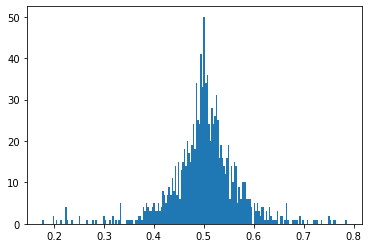

In [2]:
# LOOK AT INDIVIDUAL SUBJECT RATIOS
data_per_user = data.groupby(['user_id']).mean()

#1-back ratio per subject plot
plt.hist(data_per_user['1back_accuracy'], bins=200)
mean_1back_accuracy = data['1back_accuracy'].value_counts(1)[1]

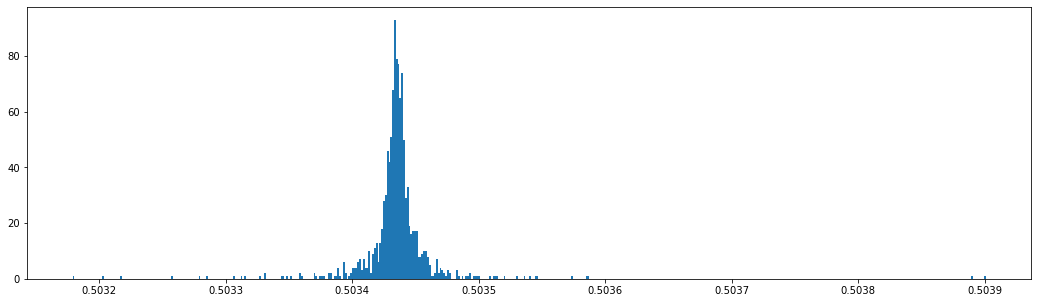

In [8]:
#PLOT 1: 1-back ratio with N-1 subject each

Out = []
ratio = data['1back_accuracy'].mean()
subjects = data['user_id'].unique()

for i in subjects:
        reduced_data = data.loc[data['user_id'] != i]
        ratio = reduced_data['1back_accuracy'].mean()
        Out.append(ratio)
        
plt.figure(figsize=(18, 5))
plt.hist(Out, bins=500);

In [85]:
# LOOK AT RATIOS OF CORRECT AND INCORRECT TRIALS EACH

# DATA FOR INCORRECT TRIALS
y = data['current_correct_answer'].shift(periods = 1)[data['score'] == 0]
x = data['chosen_answer'][data['score'] == 0]

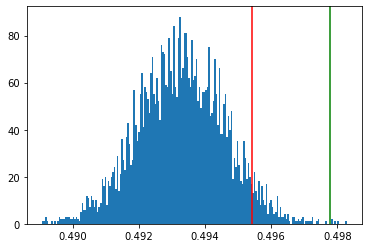

In [87]:
#PLOT 2A: ratio for incorrect trials only
    
ratios = permutation(x = x, y = y, permIter = 5000)

plt.hist(ratios, bins = 200)
incorrect_accuracy = data['1back_accuracy'][data['score'] == 0].mean()
plt.axvline(x=incorrect_accuracy, color='g')
plt.axvline(x=np.percentile(a = ratios, q = 95), color='r')

In [ ]:
melanoma_ratios = melanoma_permutation(x = x, y = y, permIter = 1000)

plt.hist(melanoma_ratios, bins = 200)
one_back_melanoma = data['current_correct_answer'].shift(periods = 1) == "['melanoma']"
melanoma_ratio_all = data['chosen_answer'][one_back_melanoma].value_counts(1)[1]
melanoma_ratio_incorrect = data['chosen_answer'][data['score'] == 0][one_back_melanoma].value_counts(1)["['melanoma']"]

plt.axvline(x=melanoma_ratio_incorrect, color='g')
plt.axvline(x=np.percentile(a = melanoma_ratios, q = 95), color='r')

In [ ]:
nevus_ratios = nevus_permutation(x = x, y = y, permIter = 1000)

plt.hist(nevus_ratios, bins = 200)
one_back_nevus = data['current_correct_answer'].shift(periods = 1) == "['nevus']"
nevus_ratio_all = data['chosen_answer'][one_back_nevus].value_counts(1)[1]
nevus_ratio_incorrect = data['chosen_answer'][data['score'] == 0][one_back_nevus].value_counts(1)["['nevus']"]

plt.axvline(x=nevus_ratio_incorrect, color='g')
plt.axvline(x=np.percentile(a = nevus_ratios, q = 95), color='r')

In [88]:
# DATA FOR CORRECT TRIALS
y = data['current_correct_answer'].shift(periods = 1)[data['score'] == 100]
x = data['chosen_answer'][data['score'] == 100]

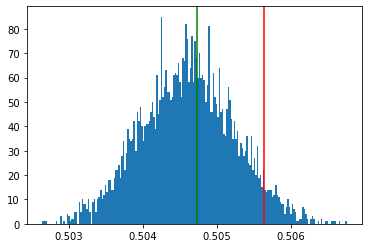

In [89]:
#PLOT 2B: ratio for correct trials only
ratios = permutation(x = x, y = y, permIter = 5000)

plt.hist(ratios, bins = 200)
correct_accuracy = data['1back_accuracy'][data['score'] == 100].mean()
plt.axvline(x=correct_accuracy, color='g')
plt.axvline(x=np.percentile(a = ratios, q = 95), color='r')

In [ ]:
melanoma_ratios = melanoma_permutation(x = x, y = y, permIter = 1000)

plt.hist(melanoma_ratios, bins = 200)
one_back_melanoma = data['current_correct_answer'].shift(periods = 1) == "['melanoma']"
melanoma_ratio_all = data['chosen_answer'][one_back_melanoma].value_counts(1)["['melanoma']"]
melanoma_ratio_correct = data['chosen_answer'][data['score'] == 100][one_back_melanoma].value_counts(1)["['melanoma']"]

plt.axvline(x=melanoma_ratio_correct, color='g')
plt.axvline(x=np.percentile(a = melanoma_ratios, q = 95), color='r')

In [ ]:
nevus_ratios = nevus_permutation(x = x, y = y, permIter = 1000)

plt.hist(nevus_ratios, bins = 200)
one_back_nevus = data['current_correct_answer'].shift(periods = 1) == "['nevus']"
nevus_ratio_all = data['chosen_answer'][one_back_nevus].value_counts(1)["['nevus']"]
nevus_ratio_correct = data['chosen_answer'][data['score'] == 100][one_back_nevus].value_counts(1)["['nevus']"]

plt.axvline(x=nevus_ratio_correct, color='g')
plt.axvline(x=np.percentile(a = nevus_ratios, q = 95), color='r')

In [96]:
# Average 1-back accuracy
data['1back_accuracy'].mean() # over all trials: 50.3
data['1back_accuracy'][data['score'] == 0].mean() # for incorrect trials: 49.8
data['1back_accuracy'][data['score'] == 100].mean() # for correct trials: 50.4